In [1]:
cd ../src

/home/sankha/Documents/programs/ML/densityNN/src


Most of the section here is obtained from this website: http://abdulfatir.com/Normalizing-Flows-Part-1/

Given a mapping $f: R^d \Rightarrow R^d$ such that $\mathbf{y} = f(\mathbf{z})$, the PDF of $\mathbf{y} = q_1(\mathbf{y})$ may be obtained from the pdf of $\mathbf{z} = q_0(\mathbf{z})$ as:

\begin{align}
q_1(\mathbf{y}) &= q_0(\mathbf{z}) \Big| \det \frac { \partial f ^ {-1} } {\partial \mathbf{y}}  \Big|  \\
                &= q_0(\mathbf{z}) \Big| \det \frac { \partial f  } {\partial \mathbf{y}}  \Big| ^ {-1} \\
\end{align}

I should work out the equations at another time.

# Planar Flow

The planar flow results from the equation:

$$f(\mathbf{z}) = \mathbf{z} + \mathbf{u}h( \mathbf{w}^T\mathbf{z} + b ) $$

where $\mathbf{u}, \mathbf{w} \in R^n, b \in R$, and $h$ is a nonlinear function such as `tanh`. 

The Jacobian is given by:

$$ \frac { \partial f(\mathbf{z}) } { \partial \mathbf{z} } = \mathbf{I} + \mathbf{u}h'( \mathbf{w}^T\mathbf{z} + b )\mathbf{w}^T  $$

Using the matrix determinant Lemma,

$$ \det \frac { \partial f(\mathbf{z}) } { \partial \mathbf{z} } = 1 + \mathbf{u}h'( \mathbf{w}^T\mathbf{z} + b )\mathbf{w}^T\mathbf{u}  $$



We shall solve the following specific equation:

\begin{align}
q_0(\mathbf{z}) &= N(\mathbf{z} | \mathbf{0}, \mathbf{I} )   \\
\mathbf{w}     &= [5, 0]^T                                    \\
\mathbf{u}     &= [1, 0]^T                                    \\
b              &= 0                                          \\
h(\mathbf{x})  &= \tanh( \mathbf{x} )                   
\end{align}

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
x, y = np.linspace(-5, 5, 11), np.linspace(-5, 5, 11)
X, Y = np.meshgrid( x, y )
z = np.vstack((X.flatten(), Y.flatten()))
z.shape

u = np.array([5, 0]).reshape((-1, 1))
w = np.array([1, 0]).reshape((-1, 1))
b = 0

f = z + u @ np.tanh( w.T @ z + b )


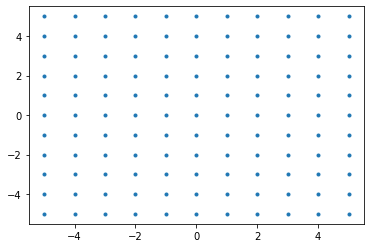

In [27]:
plt.plot( z[0], z[1], '.' )


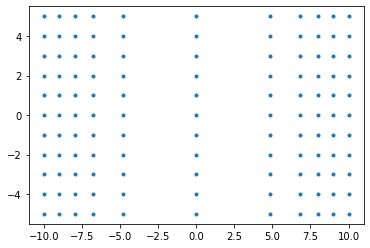

In [25]:
plt.plot( f[0], f[1], '.' )